##  Fuzzy C-means (FCM) algorithm -Week 5

In [12]:
#Below are the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math



In [13]:
data_1 = np.array(Image.open('Five_Clust.PGM'))
data_2 = np.array(Image.open('Two_Separat_Clust.PGM'))

In [14]:
#initializing the Matrix
def init_matrix(n_samples, n_clusters):
    matrix = [[random.random() for j in range(n_clusters)] for i in range(n_samples)]
    row_sums = [sum(row) for row in matrix]
    for i in range(n_samples):
        for j in range(n_clusters):
            matrix[i][j] /= row_sums[i]
    return matrix


In [7]:
#updating the cluster

def update_cluster_centers(data, matrix, m):
    n_clusters = len(matrix[0])
    n_features = len(data[0])
    centers = [[0.0 for j in range(n_features)] for i in range(n_clusters)]
    for j in range(n_clusters):
        weights = [math.pow(matrix[i][j], m) for i in range(len(matrix))]
        for k in range(n_features):
            centers[j][k] = sum([weights[i] * data[i][k] for i in range(len(data))]) / sum(weights)
    return centers


In [8]:
#updating the matrix
def update_matrix(data, centers, m):
    n_samples = len(data)
    n_clusters = len(centers)
    dist_mat = [[0.0 for j in range(n_clusters)] for i in range(n_samples)]
    for i in range(n_samples):
        for j in range(n_clusters):
            dist_mat[i][j] = sum([math.pow(abs(data[i][k] - centers[j][k]), m) for k in range(len(data[i]))])
            if dist_mat[i][j] == 0.0:
                dist_mat[i][j] = 1e-10
    matrix = [[0.0 for j in range(n_clusters)] for i in range(n_samples)]
    for i in range(n_samples):
        for j in range(n_clusters):
            matrix[i][j] = 1.0 / sum([math.pow(dist_mat[i][j] / dist_mat[i][k], 2 / (m - 1)) for k in range(n_clusters)])
    return matrix


In [9]:
#Fuzzy-c Means Algorithm 
def fuzzy_c_means(data, n_clusters, m, max_iter=100):
    matrix = init_matrix(len(data), n_clusters)
    centers = update_cluster_centers(data, matrix, m)
    for i in range(max_iter):
        matrix = update_matrix(data, centers, m)
        new_centers = update_cluster_centers(data, matrix, m)
        center_shift = sum([sum([abs(new_centers[j][k] - centers[j][k]) for k in range(len(centers[j]))]) for j in range(len(centers))])
        if center_shift < 1e-5:
            break
        centers = new_centers
    labels = [max(enumerate(row), key=lambda x: x[1])[0] for row in matrix]
    return labels, centers


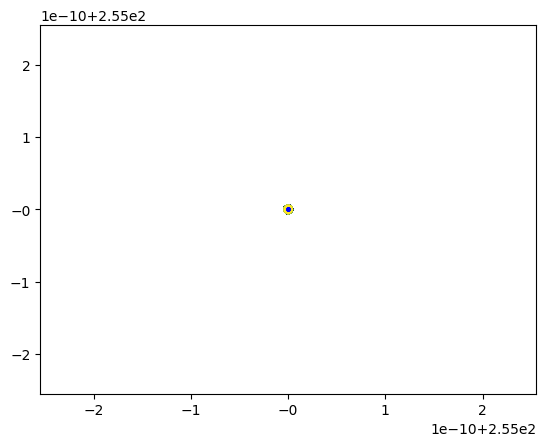

In [11]:
# Dispalying the result
data = data_1
n_clusters = 5
m = 3
labels, centers = fuzzy_c_means(data, n_clusters=n_clusters, m=m)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(np.array([center[0] for center in centers]), 
            np.array([center[1] for center in centers]), 
            marker="o", s=5, c='b')
plt.show()
